## Netflix Views Trends

In [1]:
import pandas as pd

df= pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [2]:
# convert date to datetime

df['date_added'] = pd.to_datetime(df['date_added'].str.strip() , format = '%B %d, %Y',errors = 'coerce')
#  str.strip()  - remove leading /trailing spaces
#  errors = coercce  replaces invalid dates with NaT rather giving error 

In [3]:
#  Extract month and year from date_added
df['date_year'] = df['date_added'].dt.year
df['date_month'] =df['date_added'].dt.month

### get top genres over the years

In [4]:
#  listed_in often contains multiple genres per title , so need to split and explode into indiviual rows

df_genre = df.copy()

# split Multiple genre string into List

df_genre['genre'] = df_genre['listed_in'].str.split(', ')

# explode list into invidual rows

df_genre = df_genre.explode('genre')
df_genre.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_year,date_month,genre
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,9.0,Documentaries
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,9.0,International TV Shows
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,9.0,TV Dramas
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,9.0,TV Mysteries
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,9.0,Crime TV Shows


In [5]:
# group by year and genre
# .size gives count of titles 
# name='count' turn into cleans df
top_genre = df_genre.groupby(['release_year','genre']).size().reset_index(name='count')
top_genre.head()

,release_year,genre,count
0,1925,TV Shows,1
1,1942,Classic Movies,2
2,1942,Documentaries,2
3,1943,Classic Movies,1
4,1943,Documentaries,3


In [6]:
#  get top 5 genre by total count
#  group by genre , and sum their count across all years 
#  pick largesst 5 
# get names using .index
top5 = top_genre.groupby('genre')['count'].sum().nlargest(5).index

In [7]:
top5

Index(['International Movies', 'Dramas', 'Comedies', 'International TV Shows',
       'Documentaries'],
      dtype='object', name='genre')

Text(0.5, 1.0, 'Top Genres Over Years')

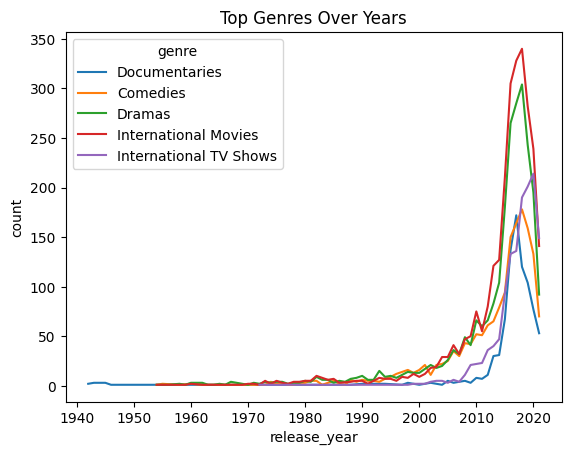

In [8]:
# Plot top genre over time
import seaborn as sns
import matplotlib.pyplot as plt

data = top_genre[top_genre['genre'].isin(top5)]
data
sns.lineplot(data = data , x='release_year' , y='count' ,hue ='genre')
plt.title('Top Genres Over Years')

### Movies vs TV shows split


Text(0.5, 1.0, 'Movies vs TV shows Split')

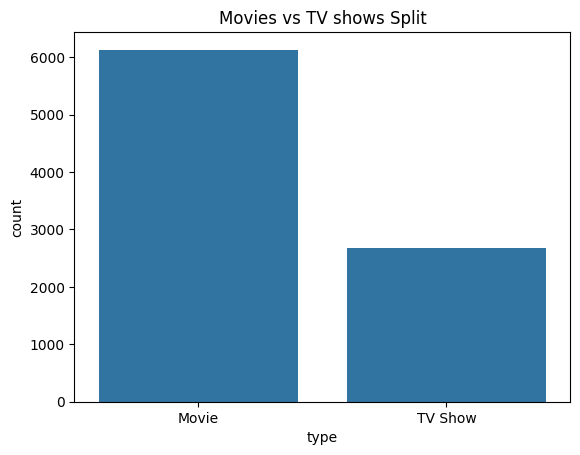

In [9]:
sns.countplot(data=df , x='type')
plt.title('Movies vs TV shows Split')

### Country Wise Distribution

In [10]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_year,date_month
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,9.0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,9.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,9.0
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0,9.0
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0,9.0


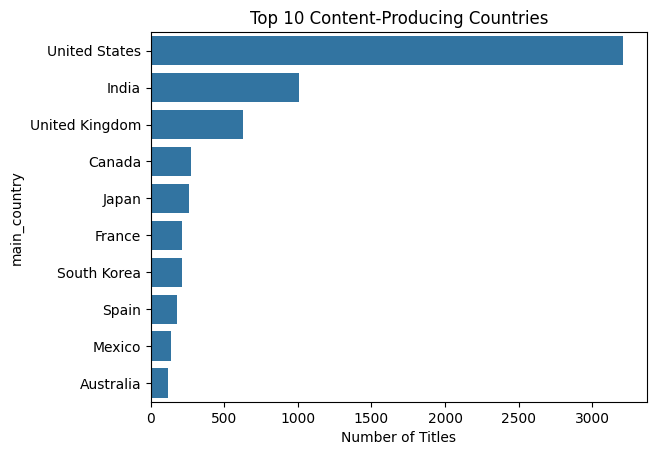

In [15]:
# some rows have multiple countries

df['main_country'] =df['country'].str.split(',').str[0]

top_countries = df['main_country'].value_counts().head(10)

sns.barplot(x=top_countries.values , y=top_countries.index)

top_countries
plt.title('Top 10 Content-Producing Countries')
plt.xlabel('Number of Titles')
plt.show()

### Releases by Month and year

In [19]:
heatmap_df = df.groupby(['date_year', 'date_month']).size().unstack(fill_value=0)
heatmap_df

date_month,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
date_year,,,,,,,,,,,,
2008.0,1,1,0,0,0,0,0,0,0,0,0,0
2009.0,0,0,0,0,1,0,0,0,0,0,1,0
2010.0,0,0,0,0,0,0,0,0,0,0,1,0
2011.0,0,0,0,0,1,0,0,0,1,11,0,0
2012.0,0,1,0,0,0,0,0,0,0,0,1,1
2013.0,0,0,1,0,0,0,0,1,2,3,2,2
2014.0,2,2,0,2,0,1,1,1,1,4,4,6
2015.0,1,4,5,5,6,6,7,2,7,14,4,21
2016.0,43,15,17,22,13,18,28,34,48,51,44,96


Text(120.72222222222221, 0.5, 'Year')

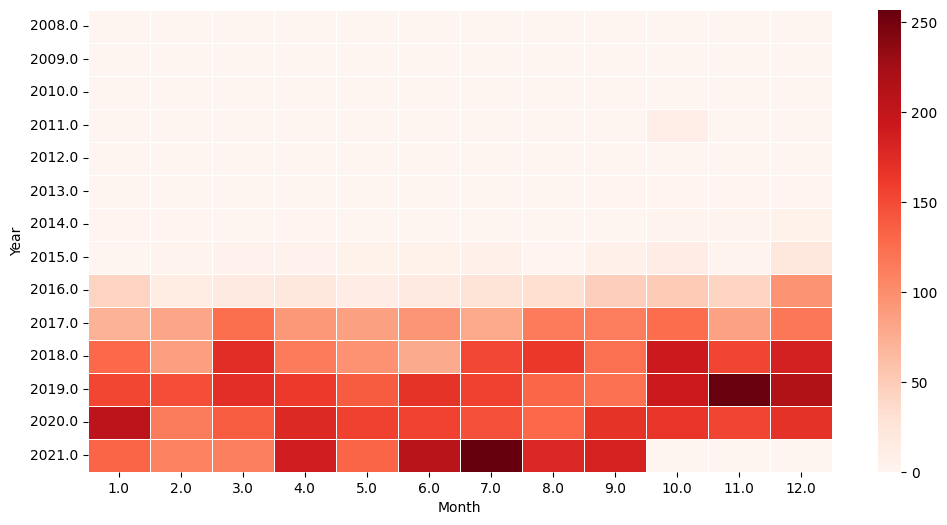

In [22]:
plt.figure(figsize=(12,6))
sns.heatmap(heatmap_df , cmap='Reds',linewidths=0.5)
plt.xlabel('Month')
plt.ylabel('Year')